In [1]:
from lxml import etree
import pandas as pd
from collections import Counter
import os
import glob
import re
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from numpy import array
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


wdir = "../../../resulting data/"


In [2]:
verses_features = pd.read_parquet(wdir +  "verses_features.parquet")

In [3]:
verses_features

,verse_text,bible_book,bible_chapter,bible_book_chapter,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,...,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,#pla75,condmened,bible_identifier
index,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,En el principio creó Dios los cielos y la tierra.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.001
b.GEN.001.002,"La tierra estaba desordenada y vacía, las tini...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.002
b.GEN.001.003,Dijo Dios Sea la luz. Y fue la luz.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.003
b.GEN.001.004,"Vio Dios que la luz era buena, y separó la luz...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.004
b.GEN.001.005,"Llamó a la luz Día, y a las tinieblas llamó No...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
b.ROM.16.5,None,ROM,16,ROM.16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.ROM.16.5
b.ROM.16.8,None,ROM,16,ROM.16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.ROM.16.8
b.ROM.16.9,None,ROM,16,ROM.16,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.ROM.16.9


In [4]:
verses_features["bible_book"].unique()

array(['GEN', 'EXO', 'LEV', 'NUM', 'DEU', 'JOS', 'JDG', 'RUT', '1SA',
       '2SA', '1KI', '2KI', '1CH', '2CH', 'EZR', 'NEH', 'EST', 'JOB',
       'PSA', 'PRO', 'ECC', 'SON', 'ISA', 'LAM', 'JER', 'EZE', 'DAN',
       'HOS', 'JOE', 'AMO', 'OBA', 'JON', 'MIC', 'NAH', 'HAB', 'ZEP',
       'HAG', 'ZEC', 'MAL', 'MAT', 'MAR', 'LUK', 'JOH', 'ACT', 'ROM',
       '1CO', '2CO', 'GAL', 'EPH', 'PHI', 'COL', '1TH', '2TH', '1TI',
       '2TI', 'TIT', 'PHM', 'HEB', 'JAM', '1PE', '2PE', '1JO', '2JO',
       '3JO', 'JUD', 'REV'], dtype=object)

In [5]:
verses_features.head()

,verse_text,bible_book,bible_chapter,bible_book_chapter,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,...,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,#pla75,condmened,bible_identifier
index,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,En el principio creó Dios los cielos y la tierra.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.001
b.GEN.001.002,"La tierra estaba desordenada y vacía, las tini...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.002
b.GEN.001.003,Dijo Dios Sea la luz. Y fue la luz.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.003
b.GEN.001.004,"Vio Dios que la luz era buena, y separó la luz...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.004
b.GEN.001.005,"Llamó a la luz Día, y a las tinieblas llamó No...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,b.GEN.001.005


In [6]:
print("\n ".join([cat for cat in verses_features.columns.tolist()]))



verse_text
 bible_book
 bible_chapter
 bible_book_chapter
 relations
 monogamy
 poligamy
 marriage
 second-marriage
 second-marriage-divorce
 second-marriage-widow
 interfaith-marriage
 interfaith-relation
 non-marital-relation
 pre-marital-relation
 relation-greater-family
 marital-relation-political-family
 lord-servant-relation
 marital-relation-direct-family
 arranged-marriage
 divorce
 engaged
 love
 jealousy
 ascendant-descendant
 primogeniture
 intercultural-ascendant-descendant
 outside-marriage-ascendant-descendant
 indirect-ascendant-descendant
 homosexual-relation
 acts
 social-related-act
 wedding
 deception
 prostitute
 body-related-act
 massage
 kiss
 hug
 dance
 abortion
 circumcision
 breast-feeding
 bath
 wash
 sexual-act
 sexual-act-stage
 consent
 seduction
 rejection
 erotic-time
 initation-sexual-act
 orgasm
 ejaculation
 time-after-sex
 sexual-act-type
 coitus
 first-sexual-act
 coitus-interruptus
 self-masturbation
 masturbation
 sleep-orgasm
 oral-sex
 anal-sex


In [7]:
sexual_categories = verses_features.columns.tolist()[8:287]

In [8]:
polarities = verses_features.columns.tolist()[288:293]

In [9]:
sexual_categories

['second-marriage',
 'second-marriage-divorce',
 'second-marriage-widow',
 'interfaith-marriage',
 'interfaith-relation',
 'non-marital-relation',
 'pre-marital-relation',
 'relation-greater-family',
 'marital-relation-political-family',
 'lord-servant-relation',
 'marital-relation-direct-family',
 'arranged-marriage',
 'divorce',
 'engaged',
 'love',
 'jealousy',
 'ascendant-descendant',
 'primogeniture',
 'intercultural-ascendant-descendant',
 'outside-marriage-ascendant-descendant',
 'indirect-ascendant-descendant',
 'homosexual-relation',
 'acts',
 'social-related-act',
 'wedding',
 'deception',
 'prostitute',
 'body-related-act',
 'massage',
 'kiss',
 'hug',
 'dance',
 'abortion',
 'circumcision',
 'breast-feeding',
 'bath',
 'wash',
 'sexual-act',
 'sexual-act-stage',
 'consent',
 'seduction',
 'rejection',
 'erotic-time',
 'initation-sexual-act',
 'orgasm',
 'ejaculation',
 'time-after-sex',
 'sexual-act-type',
 'coitus',
 'first-sexual-act',
 'coitus-interruptus',
 'self-mastur

In [10]:
structural_categories = [column for column in verses_features.columns.tolist() if "number " in column]

In [11]:
entitiy_categories = [column for column in verses_features.columns.tolist() if "#" in column]

In [12]:
verses_features.fillna(0, inplace=True)

In [13]:
verses_features.head()

,verse_text,bible_book,bible_chapter,bible_book_chapter,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,...,#pla68,#per116,#per119,#pla67,#org52,#per129,#pla74,#pla75,condmened,bible_identifier
index,,,,,,,,,,,,,,,,,,,,,
b.GEN.001.001,En el principio creó Dios los cielos y la tierra.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b.GEN.001.001
b.GEN.001.002,"La tierra estaba desordenada y vacía, las tini...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b.GEN.001.002
b.GEN.001.003,Dijo Dios Sea la luz. Y fue la luz.,GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b.GEN.001.003
b.GEN.001.004,"Vio Dios que la luz era buena, y separó la luz...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b.GEN.001.004
b.GEN.001.005,"Llamó a la luz Día, y a las tinieblas llamó No...",GEN,001,GEN.001,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b.GEN.001.005


(0.0, 20.0)

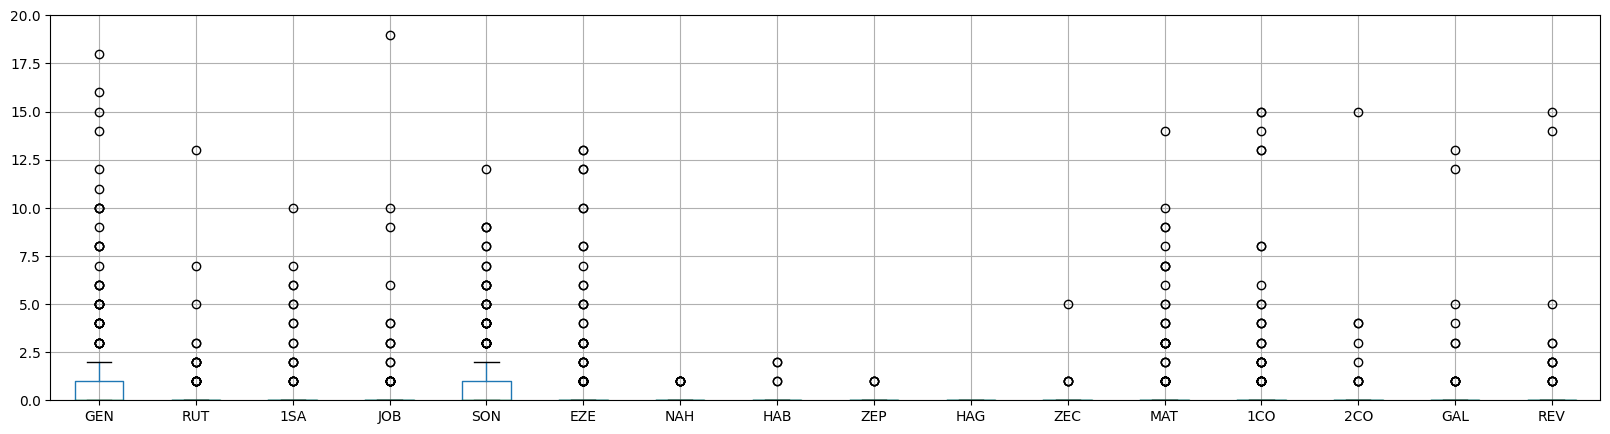

In [14]:
ax = verses_features[sexual_categories+["bible_book"]].groupby(["bible_book"]).sum().T[["GEN","RUT","1SA","JOB", "SON","EZE" , "NAH",
"HAB",
"ZEP",
"HAG",
"ZEC",
"MAT", #"ROM",
"1CO",
"2CO",
"GAL",
"REV",]].boxplot(figsize=(20,5), )
ax.set_ylim(0,20)

In [15]:
verses_features[sexual_categories].sum().sort_values(ascending=False).head(20)

ascendant-descendant    1128.0
love                     236.0
birth                    160.0
sex-outside-marriage     126.0
body                     117.0
non-marital-relation      95.0
women                     88.0
beauty                    79.0
heterosexual-sex          70.0
nudity                    66.0
flesh                     65.0
clothes                   62.0
skin                      59.0
fertilization             57.0
sexual-desire             57.0
circumcision              48.0
pregnancy                 45.0
widow                     44.0
sexual-act                43.0
men                       42.0
dtype: float64

In [16]:
sexual_categories_books = verses_features[sexual_categories+["bible_book"]].groupby(["bible_book"]).sum().T[["GEN","RUT","1SA","JOB", "SON", "EZE" , "NAH",
"HAB",
"ZEP",
"HAG",
"ZEC",
"MAT", #"ROM",
"1CO",
"2CO",
"GAL",
"REV",]]

In [17]:
sexual_categories_books["sum"] = sexual_categories_books.sum(axis=1)


In [18]:
sexual_categories_books.sort_values(by="sum", ascending=False, inplace=True)

In [19]:
sexual_categories_books.head(20)

bible_book,GEN,RUT,1SA,JOB,SON,EZE,NAH,HAB,ZEP,HAG,ZEC,MAT,1CO,2CO,GAL,REV,sum
ascendant-descendant,231.0,13.0,29.0,4.0,0.0,69.0,0.0,0.0,1.0,0.0,5.0,4.0,3.0,0.0,24.0,2.0,385.0
love,5.0,0.0,10.0,0.0,92.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,21.0,4.0,1.0,156.0
sex-outside-marriage,34.0,0.0,1.0,0.0,0.0,31.0,1.0,0.0,0.0,0.0,0.0,6.0,15.0,1.0,1.0,14.0,104.0
birth,52.0,2.0,6.0,19.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,5.0,3.0,103.0
non-marital-relation,1.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,94.0
body,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,42.0,15.0,1.0,0.0,71.0
beauty,9.0,1.0,3.0,1.0,50.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
sexual-desire,10.0,1.0,0.0,1.0,21.0,4.0,0.0,1.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,0.0,49.0
heterosexual-sex,28.0,0.0,4.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,47.0
nudity,8.0,0.0,2.0,4.0,2.0,13.0,1.0,2.0,0.0,0.0,0.0,5.0,1.0,3.0,0.0,2.0,43.0


In [20]:
sexual_categories_books.head(10)

bible_book,GEN,RUT,1SA,JOB,SON,EZE,NAH,HAB,ZEP,HAG,ZEC,MAT,1CO,2CO,GAL,REV,sum
ascendant-descendant,231.0,13.0,29.0,4.0,0.0,69.0,0.0,0.0,1.0,0.0,5.0,4.0,3.0,0.0,24.0,2.0,385.0
love,5.0,0.0,10.0,0.0,92.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,15.0,21.0,4.0,1.0,156.0
sex-outside-marriage,34.0,0.0,1.0,0.0,0.0,31.0,1.0,0.0,0.0,0.0,0.0,6.0,15.0,1.0,1.0,14.0,104.0
birth,52.0,2.0,6.0,19.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,5.0,3.0,0.0,5.0,3.0,103.0
non-marital-relation,1.0,0.0,0.0,0.0,92.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,94.0
body,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,42.0,15.0,1.0,0.0,71.0
beauty,9.0,1.0,3.0,1.0,50.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0
sexual-desire,10.0,1.0,0.0,1.0,21.0,4.0,0.0,1.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,0.0,49.0
heterosexual-sex,28.0,0.0,4.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,47.0
nudity,8.0,0.0,2.0,4.0,2.0,13.0,1.0,2.0,0.0,0.0,0.0,5.0,1.0,3.0,0.0,2.0,43.0


In [21]:
verses_features.loc[verses_features["sex-outside-marriage"]>0][polarities + ["sex-outside-marriage"]]

,blessed-aspect,positive-aspect,neutral-aspect,negative-aspect,condemned-aspect,sex-outside-marriage
index,,,,,,
b.GEN.019.005,0.0,0.0,0.0,0.0,1.0,1.0
b.GEN.019.007,0.0,0.0,0.0,0.0,1.0,1.0
b.GEN.019.008,0.0,0.0,1.0,0.0,0.0,1.0
b.GEN.019.031,0.0,0.0,1.0,0.0,0.0,1.0
b.GEN.019.032,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...
b.2SA.12.13,0.0,1.0,0.0,0.0,1.0,1.0
b.ROM.1.29,0.0,0.0,0.0,0.0,1.0,1.0
b.ROM.2.22,0.0,0.0,0.0,1.0,0.0,1.0


In [22]:
polarities
polarities_int = []
for polarity in polarities:
    verses_features[polarity + "_int"] =  verses_features[polarity].replace(0, np.nan)
    polarities_int.append(polarity + "_int")

In [23]:
polarities_int

['blessed-aspect_int',
 'positive-aspect_int',
 'neutral-aspect_int',
 'negative-aspect_int',
 'condemned-aspect_int']

In [24]:
verses_features["blessed-aspect_int"].dropna()

index
b.GEN.002.007    1.0
b.GEN.002.021    1.0
b.GEN.002.022    1.0
b.GEN.002.023    1.0
b.GEN.002.024    1.0
                ... 
b.ROM.12.5       1.0
b.ROM.13.8       1.0
b.ROM.13.10      1.0
b.ROM.15.8       1.0
b.ROM.16.16      1.0
Name: blessed-aspect_int, Length: 241, dtype: float64

In [25]:
verses_features.loc[verses_features["blessed-aspect_int"]>0, "blessed-aspect_int"] = 2
verses_features.loc[verses_features["positive-aspect_int"]>0, "positive-aspect_int"] = 1
verses_features.loc[verses_features["neutral-aspect_int"]>0, "neutral-aspect_int"] = 0
verses_features.loc[verses_features["negative-aspect_int"]>0, "negative-aspect_int"] = -1
verses_features.loc[verses_features["condemned-aspect_int"]>0, "condemned-aspect_int"] = -2

In [26]:
verses_features.loc[verses_features["sex-outside-marriage"]>0][polarities_int].sum(axis=1).mean()

-1.2063492063492063

In [27]:
results = []
for sexual_category in sexual_categories:
    mean = verses_features.loc[verses_features[sexual_category]>0][polarities_int].sum(axis=1).mean()
    sum_ = verses_features.loc[verses_features[sexual_category]>0][polarities_int].sum(axis=1).sum()
    median = verses_features.loc[verses_features[sexual_category]>0][polarities_int].sum(axis=1).median()
    std = verses_features.loc[verses_features[sexual_category]>0][polarities_int].sum(axis=1).std()
    
    results.append([sexual_category, mean, sum_, median, std])
    
    


In [28]:
sexcat_metrics_polarity = pd.DataFrame(results, columns = ["sexual_category", "mean", "sum", "median", "std"])




In [29]:
sexcat_metrics_polarity

,sexual_category,mean,sum,median,std
0,second-marriage,-0.250000,-1.0,0.0,1.258306
1,second-marriage-divorce,NaN,0.0,NaN,NaN
2,second-marriage-widow,0.000000,0.0,0.0,NaN
3,interfaith-marriage,-0.857143,-12.0,-0.5,1.099450
4,interfaith-relation,-0.800000,-4.0,-1.0,0.836660
...,...,...,...,...,...
274,part-of-the-day,NaN,0.0,NaN,NaN
275,night,1.000000,3.0,1.0,0.000000
276,sunrise,1.000000,1.0,1.0,NaN
277,seasons,NaN,0.0,NaN,NaN


In [33]:
sexcat_metrics_polarity.sort_values("sum").head(20)

,sexual_category,mean,sum,median,std
72,sex-outside-marriage,-1.206349,-152.0,-1.0,0.740999
84,greater-family-sex,-1.358974,-53.0,-2.0,0.810691
98,nudity,-0.772727,-51.0,-1.0,1.078396
246,female-prostitutes,-1.105263,-42.0,-1.0,0.923843
61,female-sexual-assault,-1.521739,-35.0,-2.0,0.665348
76,heterosexual-sex,-0.485714,-34.0,-0.5,0.943980
37,sexual-act,-0.767442,-33.0,-1.0,1.211791
133,skin,-0.525424,-31.0,-1.0,0.703585
71,sex-before-marriage,-1.250000,-30.0,-2.0,0.989071
64,sexual-drive,-1.450000,-29.0,-1.5,0.825578


In [37]:
sexcat_metrics_polarity.loc[sexcat_metrics_polarity["mean"].notna()].sort_values("mean").head(20)

,sexual_category,mean,sum,median,std
79,lesbian-sex,-2.000000,-2.0,-2.0,NaN
74,sex-menstruation,-2.000000,-2.0,-2.0,NaN
234,homosexuals,-2.000000,-2.0,-2.0,NaN
51,self-masturbation,-2.000000,-2.0,-2.0,NaN
87,angel-human-sex,-2.000000,-4.0,-2.0,0.000000
78,gay-sex,-2.000000,-8.0,-2.0,0.000000
163,skirt,-2.000000,-2.0,-2.0,NaN
26,prostitute,-2.000000,-2.0,-2.0,NaN
22,acts,-1.857143,-13.0,-2.0,0.377964
18,intercultural-ascendant-descendant,-1.750000,-7.0,-2.0,0.500000


In [32]:
sexcat_metrics_polarity.loc[sexcat_metrics_polarity["mean"].notna()].sort_values("mean").head(20)

,sexual_category,mean,sum,median,std
79,lesbian-sex,-2.000000,-2.0,-2.0,NaN
74,sex-menstruation,-2.000000,-2.0,-2.0,NaN
234,homosexuals,-2.000000,-2.0,-2.0,NaN
51,self-masturbation,-2.000000,-2.0,-2.0,NaN
87,angel-human-sex,-2.000000,-4.0,-2.0,0.000000
78,gay-sex,-2.000000,-8.0,-2.0,0.000000
163,skirt,-2.000000,-2.0,-2.0,NaN
26,prostitute,-2.000000,-2.0,-2.0,NaN
22,acts,-1.857143,-13.0,-2.0,0.377964
18,intercultural-ascendant-descendant,-1.750000,-7.0,-2.0,0.500000


In [48]:
verses_features.loc[verses_features["self-masturbation"] > 0]

,verse_text,bible_book,bible_chapter,bible_book_chapter,relations,monogamy,poligamy,marriage,second-marriage,second-marriage-divorce,...,#per129,#pla74,#pla75,condmened,bible_identifier,blessed-aspect_int,positive-aspect_int,neutral-aspect_int,negative-aspect_int,condemned-aspect_int
index,,,,,,,,,,,,,,,,,,,,,
b.MAT.005.030,"Y si tu mano derecha te es Ocasión de caer, Có...",MAT,005,MAT.005,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,b.MAT.005.030,NaN,NaN,NaN,NaN,-2.0


In [38]:
sexcat_metrics_polarity.loc[sexcat_metrics_polarity["std"].notna()].sort_values("std").head(20)

,sexual_category,mean,sum,median,std
124,cheek,1.0,4.0,1.0,0.0
176,milk,1.0,3.0,1.0,0.0
172,bracelet,1.0,4.0,1.0,0.0
171,collar,1.0,2.0,1.0,0.0
170,piercing,1.0,2.0,1.0,0.0
165,male-underwear,1.0,3.0,1.0,0.0
158,smell,1.0,9.0,1.0,0.0
156,menstrual-disorder,0.0,0.0,0.0,0.0
181,spices,1.0,7.0,1.0,0.0
142,rib,2.0,4.0,2.0,0.0


In [31]:
sexcat_metrics_polarity.sort_values("sum").tail(20)

,sexual_category,mean,sum,median,std
200,pitcher,0.900000,9.0,1.0,0.316228
158,smell,1.000000,9.0,1.0,0.000000
154,sleep,0.750000,9.0,1.0,0.753778
100,pregnancy,0.200000,9.0,0.0,0.814639
270,flowers,0.833333,10.0,1.0,0.389249
13,engaged,0.370370,10.0,0.0,0.926040
28,massage,1.111111,10.0,1.0,0.927961
268,camel,1.000000,10.0,1.0,0.471405
175,water,0.275000,11.0,0.0,0.986771
11,arranged-marriage,0.392857,11.0,0.5,0.737327


In [ ]:
sexcat_metrics_polarity.sort_values("sum").tail(20)